In [15]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
import torch
from IPython import display
import random

/var/folders/90/l1bfwzjx4ms6v5_k7236h2n40000gn/T/ipykernel_27841/670662834.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')   #设置格式


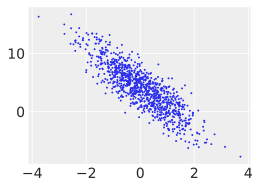

In [16]:
num_inputs = 2      #特征数量
num_examples = 1000 #样本数量
true_w = [2, -3.4]  #真实权重   list
true_b = 4.2        #真实偏差
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)   #随机生成样本特征，从标准正态分布（均值为0，方差为1，即高斯白噪声）中抽取的一组随机数 Tensor
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b #y=Xw.T+b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),   dtype=torch.float32)    # 加上随机噪声   Tensor
def set_figsize(figsize=(3.5, 2.5)):    #设置大小
    display.set_matplotlib_formats('svg')   #设置格式
    plt.rcParams['figure.figsize'] = figsize
set_figsize()
plt.scatter(features[:,1].numpy(), labels.numpy(), 1)   #绘制散点图


In [17]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)    #获取样本大小
    indices = list(range(num_examples)) #创建0-样本大小的索引，通过索引寻找样本
    random.shuffle(indices)             #打乱索引数组
    for i in range(0, num_examples, batch_size):    #i从0-样本数，每次增加batch_size
        #j是Long类型的Tesor，用来存储当前batch选中的样本
        j = torch.LongTensor(indices[i:min(i + batch_size, num_examples)])
        #yield相当于renturn，只不过下次调用此函数的时候不是从头开始运行，而是再回到这里
        yield features.index_select(0, j), labels.index_select(0, j) #index_selct函数，第一个参数是维度，第二参数是索引Tensor
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


tensor([[ 0.2105, -0.8925],
        [-0.6703, -0.1377],
        [-1.2019, -0.2247],
        [ 0.2945, -1.0850],
        [ 0.1325,  0.2089],
        [ 0.2565,  0.8554],
        [ 1.2401,  0.2804],
        [-0.4267, -1.5668],
        [-1.9341, -0.0692],
        [ 1.2357,  0.2723]]) tensor([7.6496, 3.3204, 2.5748, 8.4857, 3.7509, 1.7963, 5.7341, 8.6730, 0.5818,
        5.7493])


In [40]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

def linreg(X, w, b):  # w初始化的时候就转置了，shapes是(num_inputs, 1)
    return torch.mm(X, w) + b

# 定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2
optimizer = torch.optim.Adam([w, b], lr=0.01)



# 定义优化算法
def sgd(params, lr, batch_size):
    for param in params:
        param = param - lr * param.grad / batch_size

In [41]:
# 训练模型
lr = 0.03       #学习率
num_epochs = 300  #迭代次数
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):    #读取数据
        optimizer.zero_grad()

        l = squared_loss(linreg(X, w, b), y).sum()          #计算本次batch_size的损失
        l.backward()                                        #自动求梯度
        
        optimizer.step()
    train_l = squared_loss(linreg(features, w, b), labels)  #本次迭代完的损失 (1000,1)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))


epoch 1, loss 9.125521
epoch 2, loss 4.977014
epoch 3, loss 2.513937
epoch 4, loss 1.166729
epoch 5, loss 0.492951
epoch 6, loss 0.188086
epoch 7, loss 0.064699
epoch 8, loss 0.020288
epoch 9, loss 0.005523
epoch 10, loss 0.001374
epoch 11, loss 0.000339
epoch 12, loss 0.000104
epoch 13, loss 0.000058
epoch 14, loss 0.000051
epoch 15, loss 0.000049
epoch 16, loss 0.000049
epoch 17, loss 0.000049
epoch 18, loss 0.000049
epoch 19, loss 0.000049
epoch 20, loss 0.000049
epoch 21, loss 0.000049
epoch 22, loss 0.000049
epoch 23, loss 0.000049
epoch 24, loss 0.000049
epoch 25, loss 0.000049
epoch 26, loss 0.000049
epoch 27, loss 0.000049
epoch 28, loss 0.000049
epoch 29, loss 0.000049
epoch 30, loss 0.000049
epoch 31, loss 0.000049
epoch 32, loss 0.000049
epoch 33, loss 0.000050
epoch 34, loss 0.000049
epoch 35, loss 0.000050
epoch 36, loss 0.000049
epoch 37, loss 0.000049
epoch 38, loss 0.000050
epoch 39, loss 0.000049
epoch 40, loss 0.000049
epoch 41, loss 0.000049
epoch 42, loss 0.000049
e